In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("OECD PISA data.csv")

In [3]:
df.head()

index LOCATION INDICATOR SUBJECT  TIME    Value
0      0      AUS  PISAMATH     BOY  2003  527.000
1      1      AUS  PISAMATH     BOY  2006  527.000
2      2      AUS  PISAMATH     BOY  2009  519.000
3      3      AUS  PISAMATH     BOY  2012  510.115
4      4      AUS  PISAMATH     BOY  2015  497.000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      2087 non-null   int64  
 1   LOCATION   2087 non-null   object 
 2   INDICATOR  2087 non-null   object 
 3   SUBJECT    2087 non-null   object 
 4   TIME       2087 non-null   int64  
 5   Value      2087 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 98.0+ KB


In [5]:
df.shape

(2087, 6)

In [6]:
#dropping the index column
df = df.drop(columns = 'index')

In [8]:
#Time based trends

# Filter data for specific subjects (Reading, Mathematics, and Science)
subjects_of_interest = ['PISAREAD', 'PISAMATH', 'PISASCIENCE']
df_filtered = df[df['INDICATOR'].isin(subjects_of_interest)]

# Create an interactive line plot for each subject
for subject in subjects_of_interest:
    # Filter data for each subject
    df_subject = df_filtered[df_filtered['INDICATOR'] == subject]

    # Create an interactive line plot using Plotly Express
    fig = px.line(df_subject, x='TIME', y='Value', color='LOCATION', markers=True,
                  labels={'Value': 'Mean Score', 'TIME': 'Year'},
                  title=f'Time-based Trends - {subject}',
                  line_shape='linear')  # You can change line_shape to 'linear', 'spline', etc.

    # Show the plot
    fig.show()

    # Save the graph as an HTML file with the graph title as the file name
    file_name = f'Time-based_Trends_{subject}.html'
    fig.write_html(file_name)

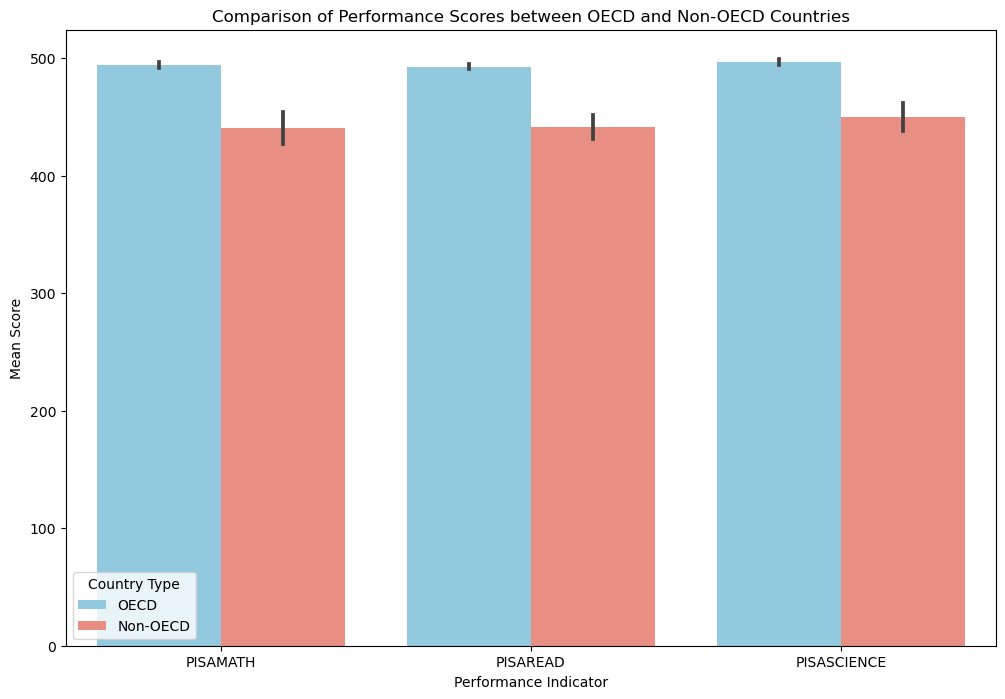

In [10]:
# Separate the dataset into OECD and non-OECD countries
oecd_countries = ['AUS', 'AUT', 'BEL', 'CAN', 'CHE', 'CHL', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HUN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 'MEX', 'NLD', 'NOR', 'NZL', 'POL', 'PRT', 'SVK', 'SVN', 'SWE', 'TUR', 'USA']
df['CountryType'] = df['LOCATION'].apply(lambda x: 'OECD' if x in oecd_countries else 'Non-OECD')

# Create a custom color palette
colors = {'OECD': 'skyblue', 'Non-OECD': 'salmon'}

# Create a bar plot to compare mean scores between OECD and Non-OECD countries
plt.figure(figsize=(12, 8))

sns.barplot(x='INDICATOR', y='Value', hue='CountryType', data=df, palette=colors)

plt.title('Comparison of Performance Scores between OECD and Non-OECD Countries')
plt.xlabel('Performance Indicator')
plt.ylabel('Mean Score')
plt.legend(title='Country Type')
plt.savefig("Comparison of Performance Scores between OECD and Non-OECD Countries")
plt.show()

C:\Users\Mariam\AppData\Local\Temp\ipykernel_22580\2148395911.py:16: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




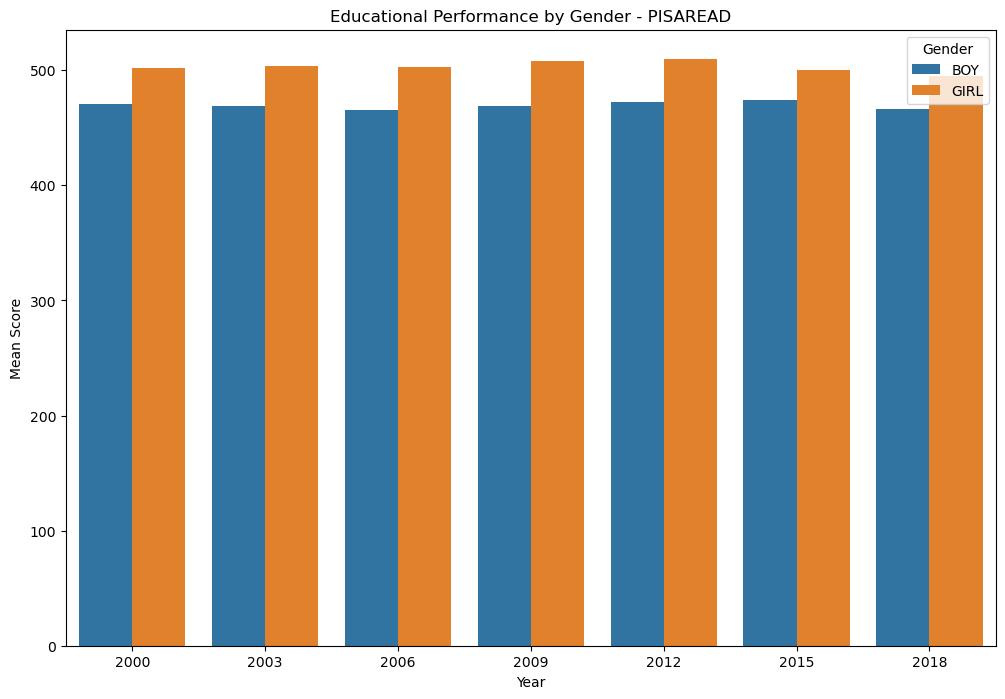

C:\Users\Mariam\AppData\Local\Temp\ipykernel_22580\2148395911.py:16: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




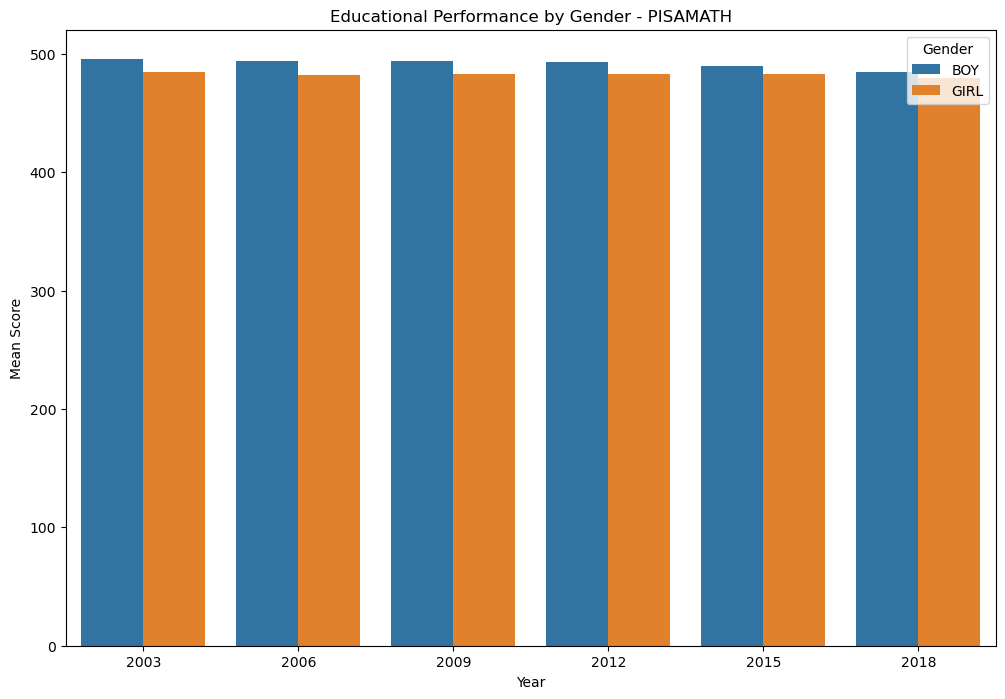

C:\Users\Mariam\AppData\Local\Temp\ipykernel_22580\2148395911.py:16: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




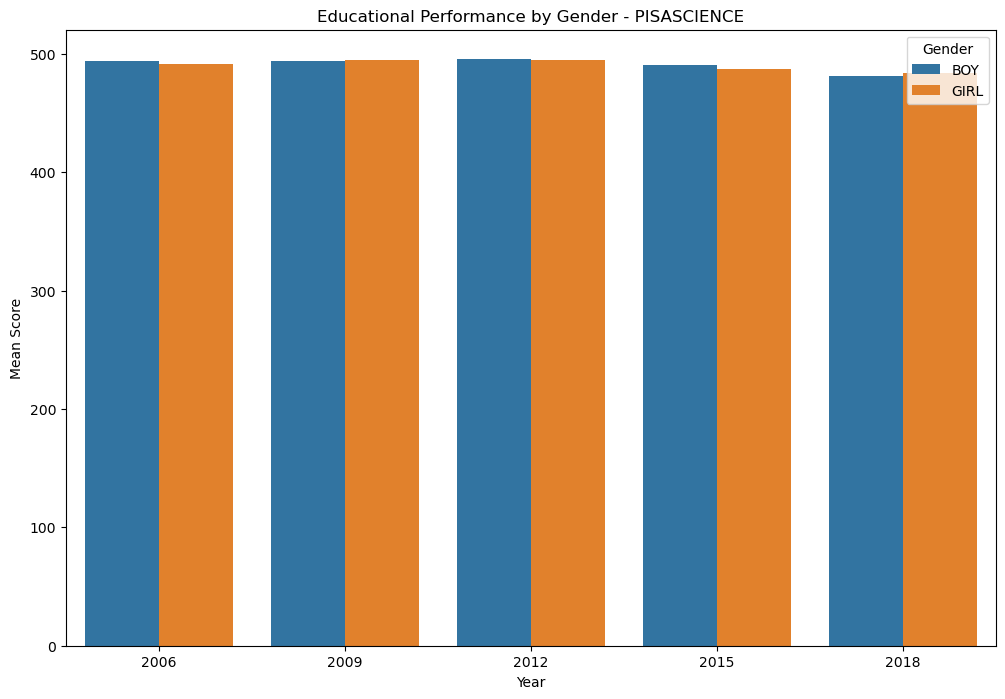

In [11]:
#bar plots for gender based comparison

# Filter data for specific subjects (Reading, Mathematics, and Science) and genders (Boy and Girl)
subjects_of_interest = ['PISAREAD', 'PISAMATH', 'PISASCIENCE']
genders = ['BOY', 'GIRL']
df_filtered = df[(df['INDICATOR'].isin(subjects_of_interest)) & (df['SUBJECT'].isin(genders))]

# Create separate plots for each subject and gender
for subject in subjects_of_interest:
    plt.figure(figsize=(12, 8))

    # Filter data for each subject
    df_subject = df_filtered[df_filtered['INDICATOR'] == subject]

    # Plot each gender's performance over time or in individual countries
    sns.barplot(x='TIME', y='Value', hue='SUBJECT', data=df_subject, ci=None)  # Use ci='sd' for standard deviation

    plt.title(f'Educational Performance by Gender - {subject}')
    plt.xlabel('Year')
    plt.ylabel('Mean Score')
    plt.legend(title='Gender')

    # Save the graph as a PNG file with the graph title as the file name
    file_name = f'Educational_Performance_by_Gender_{subject}.png'
    plt.savefig(file_name)

    plt.show()


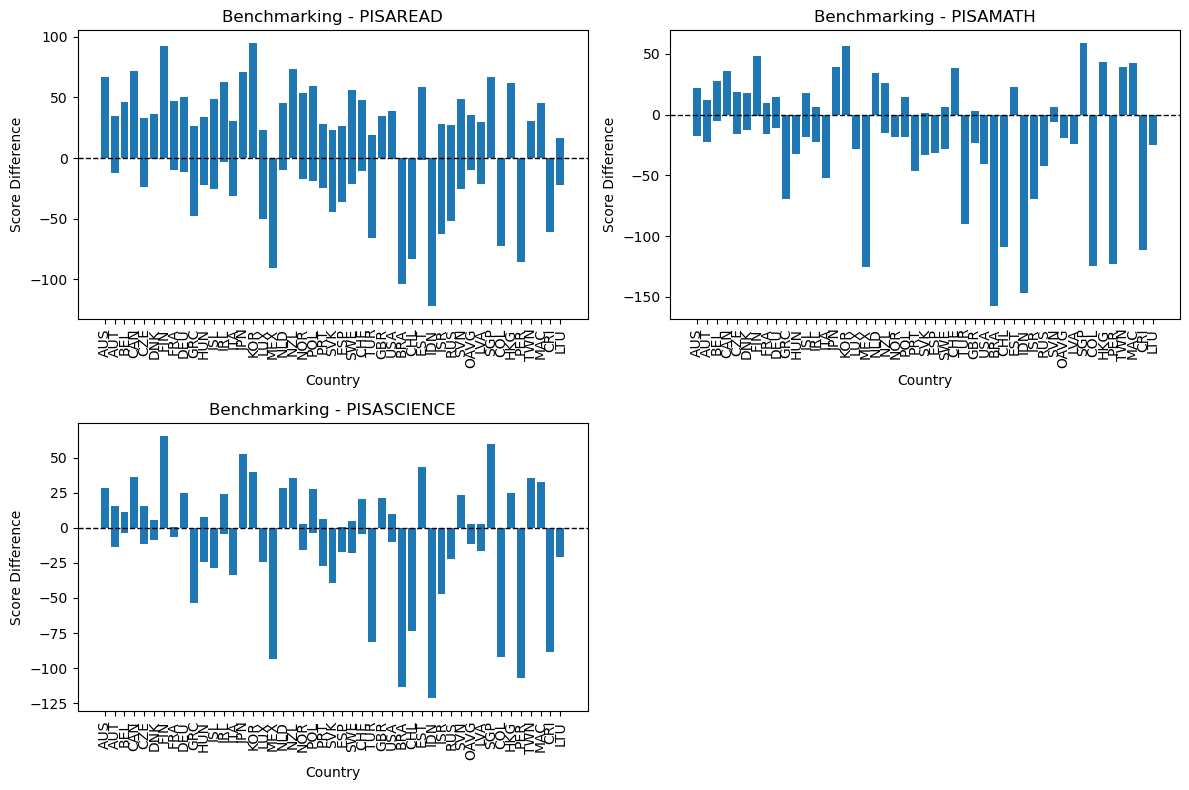

In [13]:
# comparison with benchmark

# Filter data for specific subjects (Reading, Mathematics, and Science)
subjects_of_interest = ['PISAREAD', 'PISAMATH', 'PISASCIENCE']
df_filtered = df[df['INDICATOR'].isin(subjects_of_interest)]

# Separate the dataset into OECD and non-OECD countries
oecd_countries = ['AUS', 'AUT', 'BEL', 'CAN', 'CHE', 'CHL', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HUN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 'MEX', 'NLD', 'NOR', 'NZL', 'POL', 'PRT', 'SVK', 'SVN', 'SWE', 'TUR', 'USA']
df['CountryType'] = df['LOCATION'].apply(lambda x: 'OECD' if x in oecd_countries else 'Non-OECD')

# Filter data for OAVG
df_oavg = df[df['LOCATION'] == 'OAVG']

# Create a bar plot to compare mean scores between individual countries and OAVG
plt.figure(figsize=(12, 8))

for subject in subjects_of_interest:
    plt.subplot(2, 2, subjects_of_interest.index(subject) + 1)

    # Filter data for each subject
    df_subject = df_filtered[df_filtered['INDICATOR'] == subject]

    # Plot individual country's performance against OAVG
    plt.bar(df_subject['LOCATION'], df_subject['Value'] - df_oavg[df_oavg['INDICATOR'] == subject]['Value'].values[0])

    plt.title(f'Benchmarking - {subject}')
    plt.xlabel('Country')
    plt.xticks(rotation = 90)
    plt.ylabel('Score Difference')
    plt.axhline(0, color='black', linestyle='dashed', linewidth=1)  # Reference line at 0

plt.tight_layout()
plt.savefig("comparison with benchmark")
plt.show()

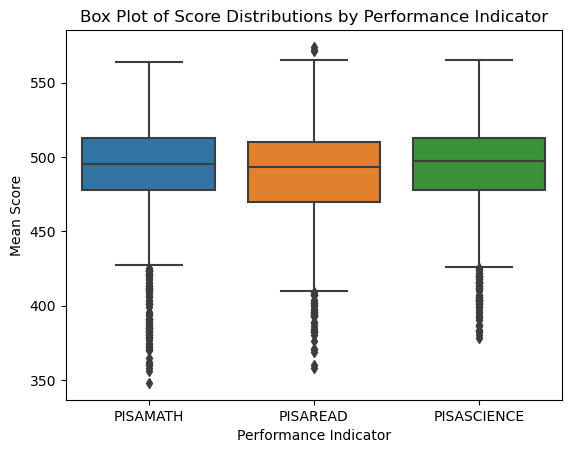

In [16]:
#box plot for score distribution

import seaborn as sns
sns.boxplot(x='INDICATOR', y='Value', data=df)
plt.title('Box Plot of Score Distributions by Performance Indicator')
plt.xlabel('Performance Indicator')
plt.ylabel('Mean Score')
plt.savefig("Box Plot of score Distribution by performance indicator")
plt.show()

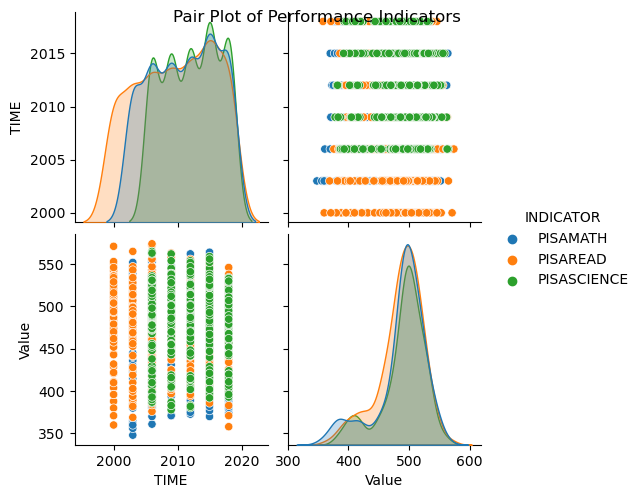

In [17]:
# pair plots for correlation analysis
sns.pairplot(df_filtered, hue='INDICATOR', markers='o')
plt.suptitle('Pair Plot of Performance Indicators')
plt.savefig("pair plot of performance indicators")
plt.show()

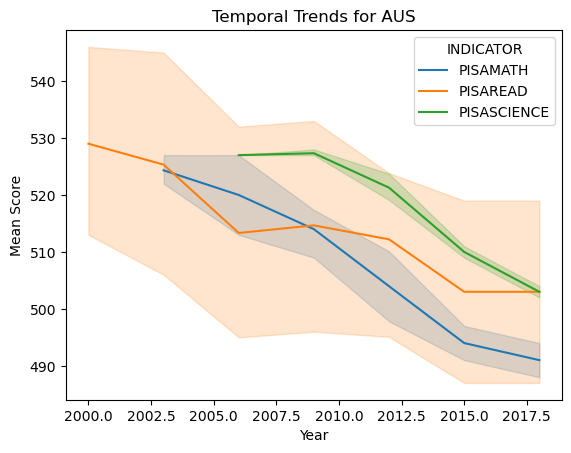

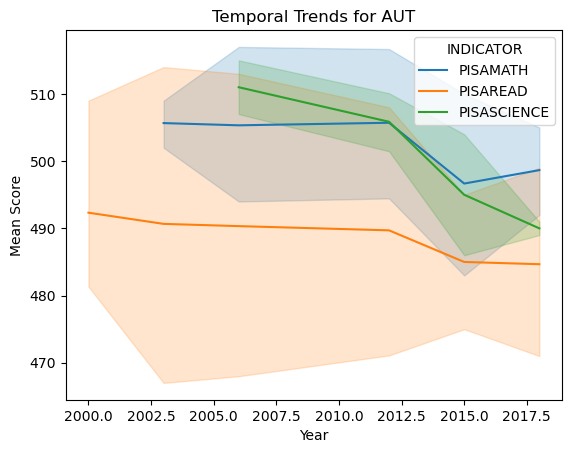

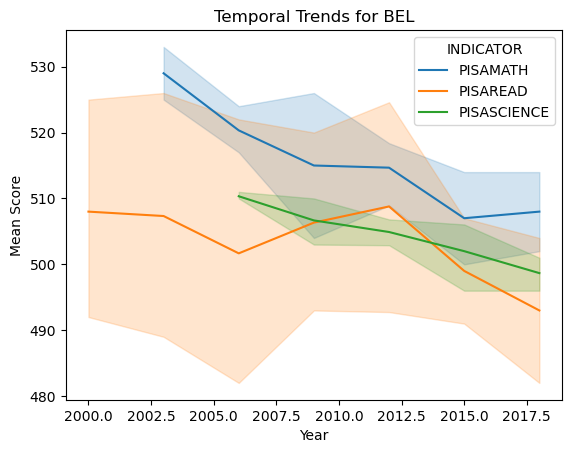

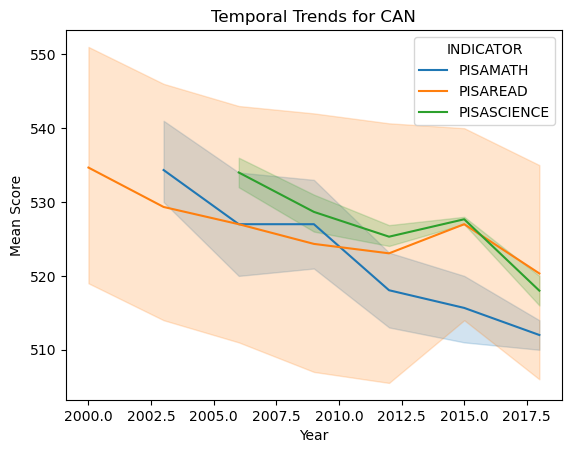

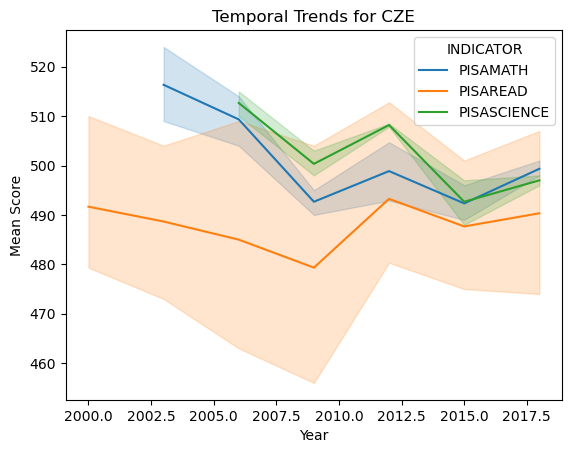

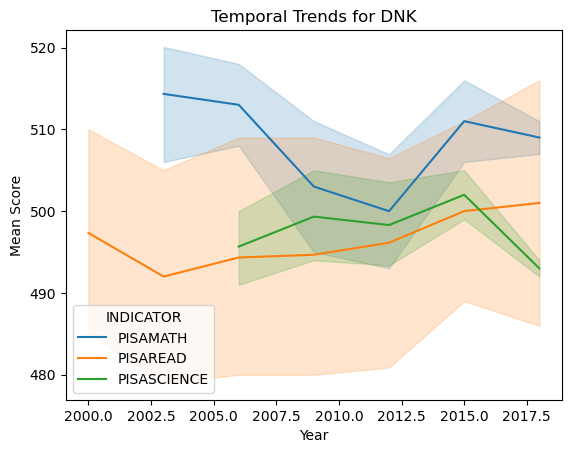

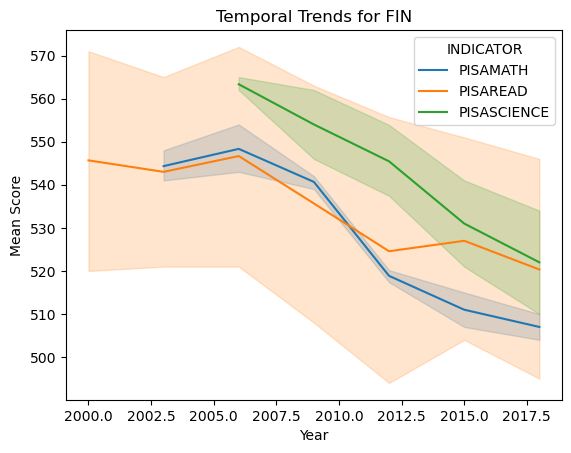

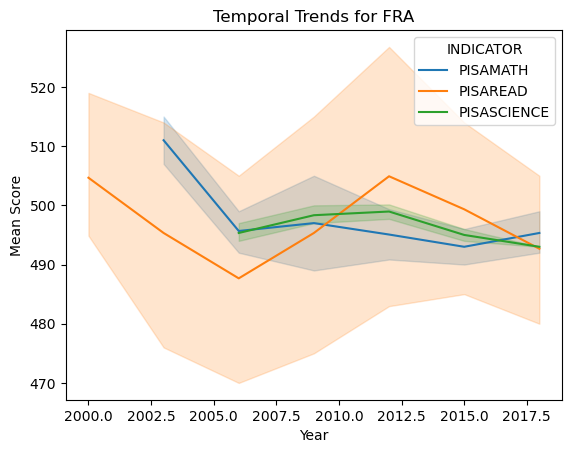

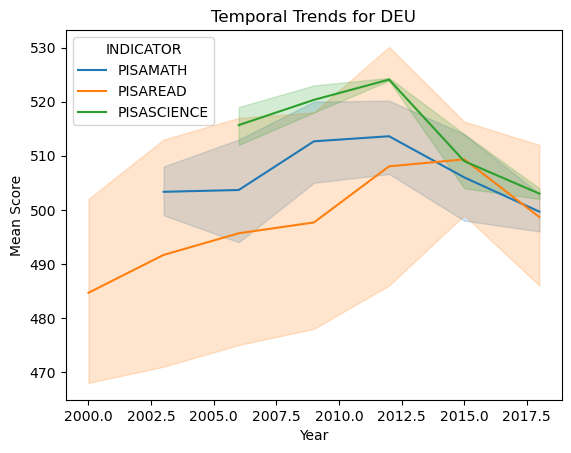

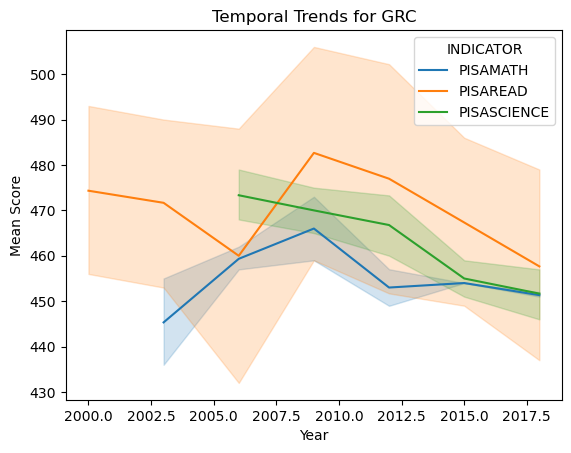

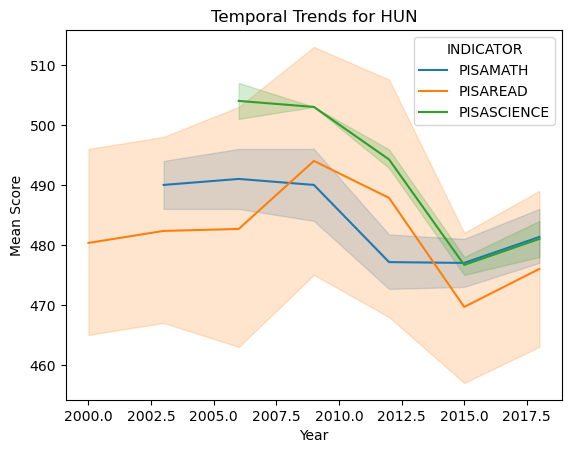

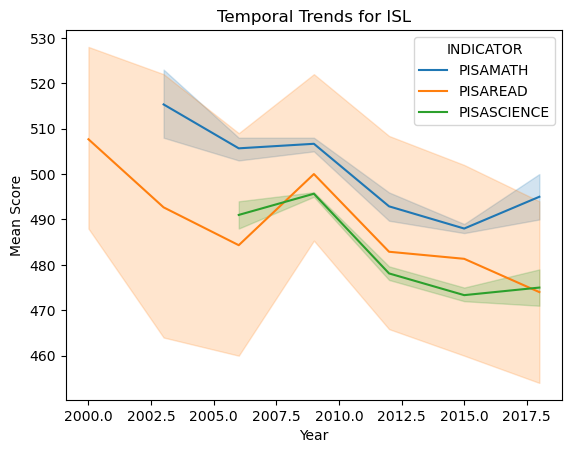

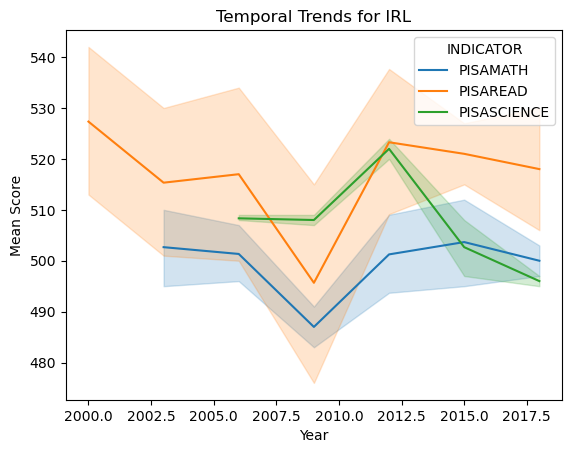

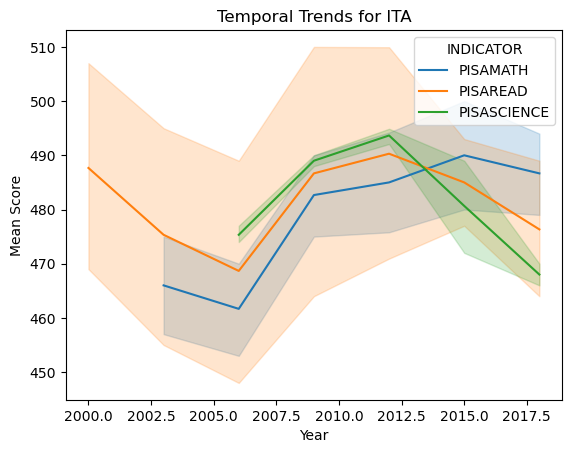

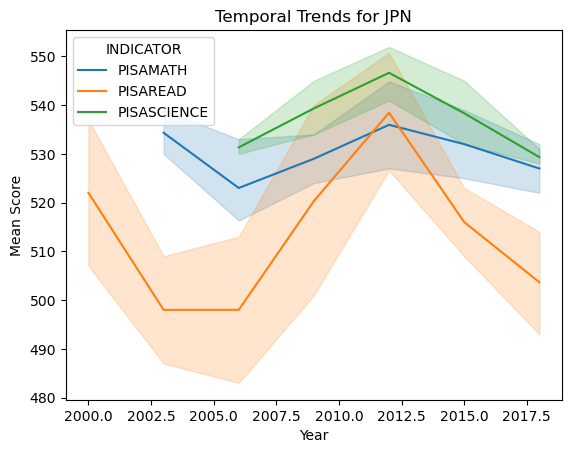

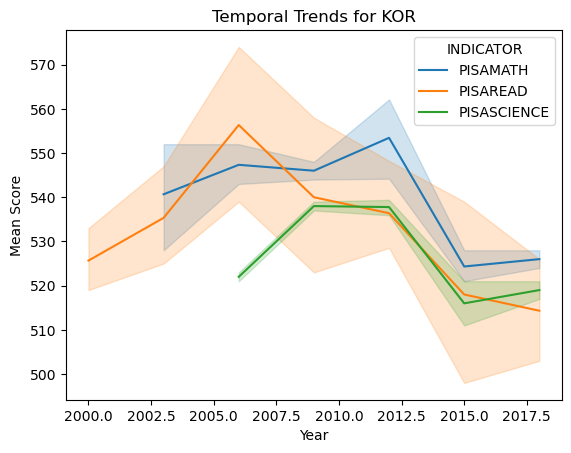

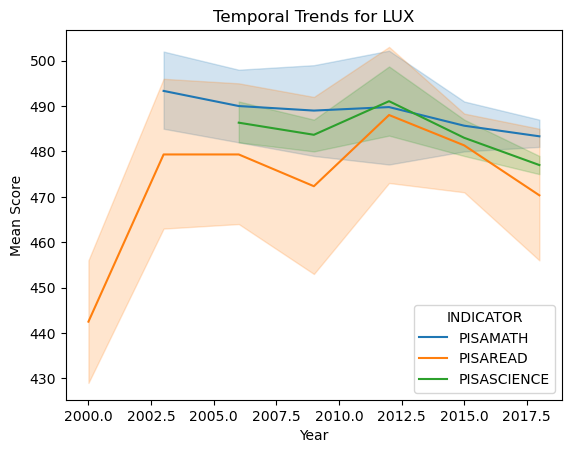

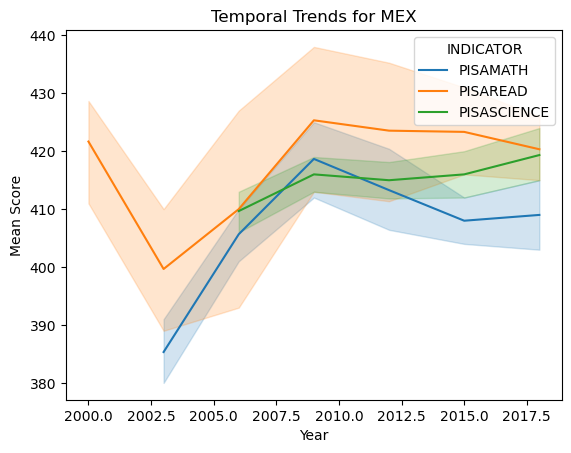

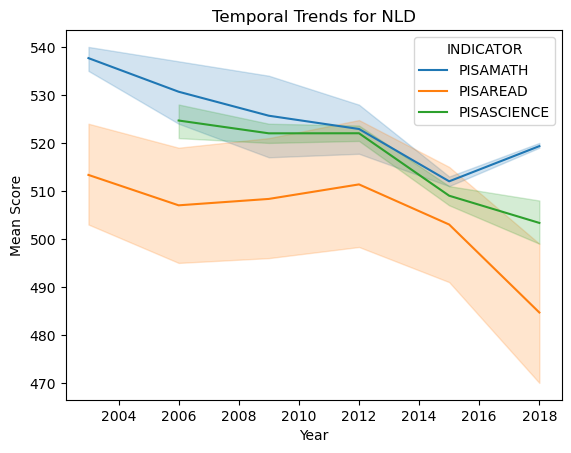

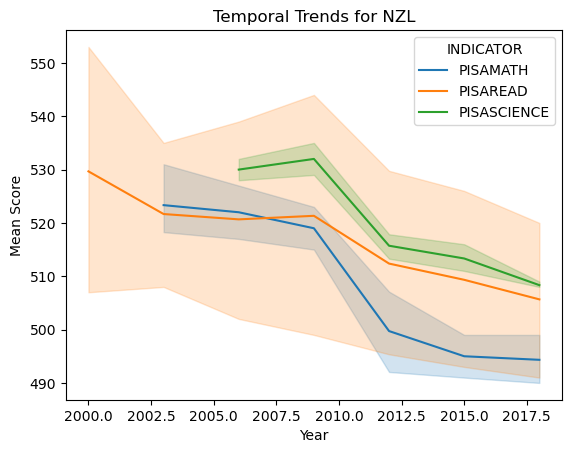

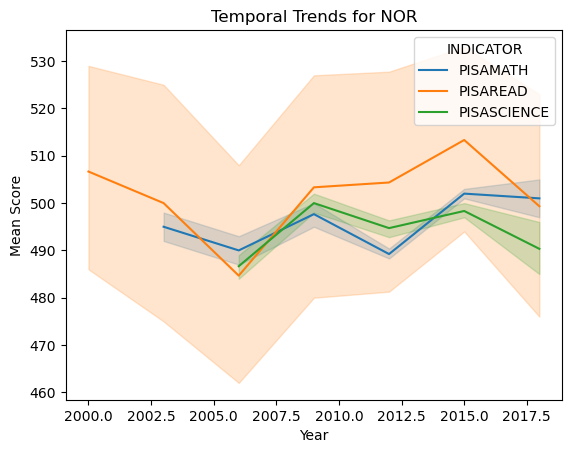

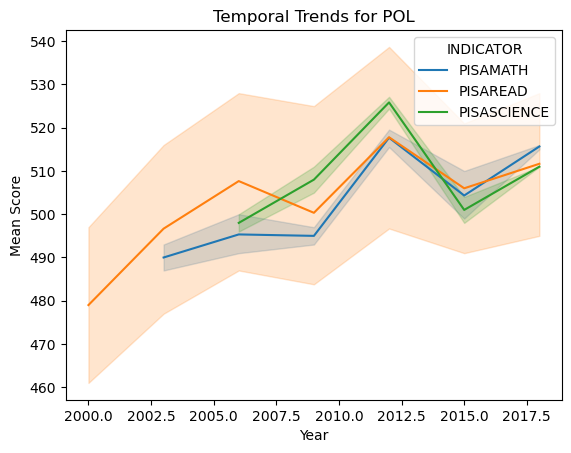

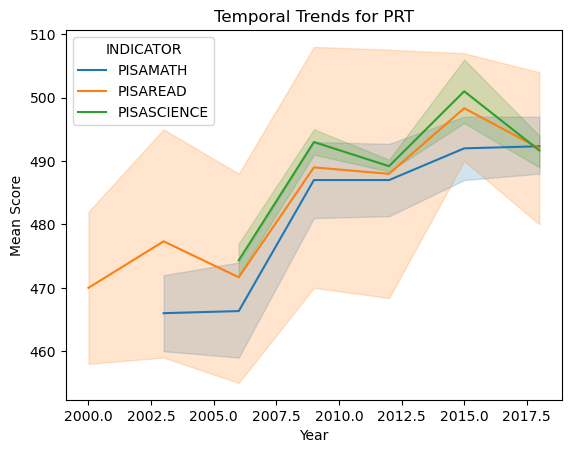

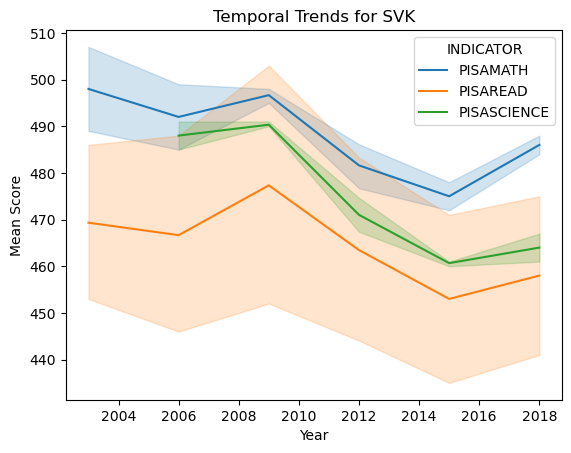

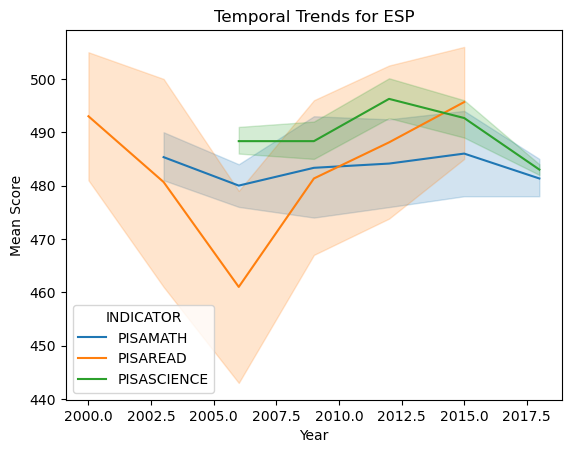

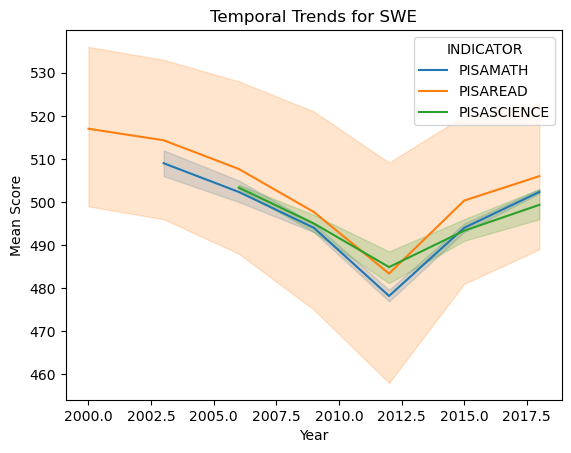

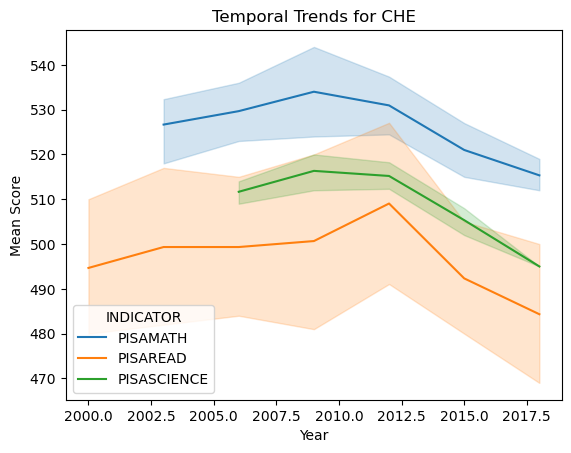

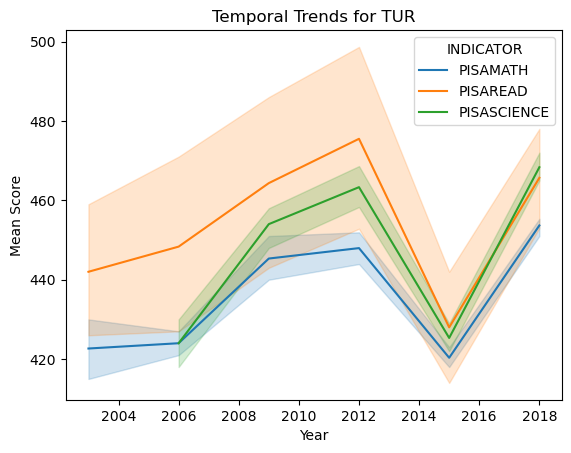

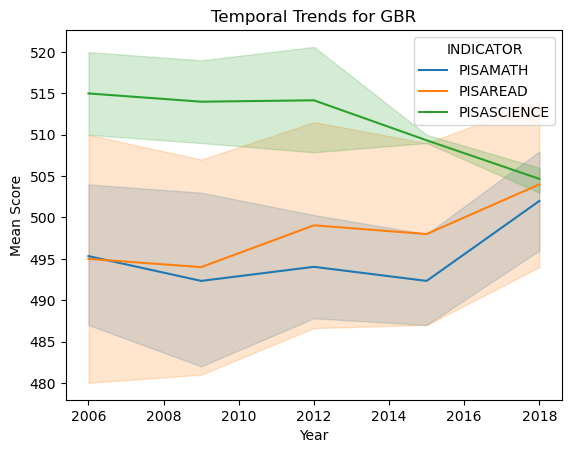

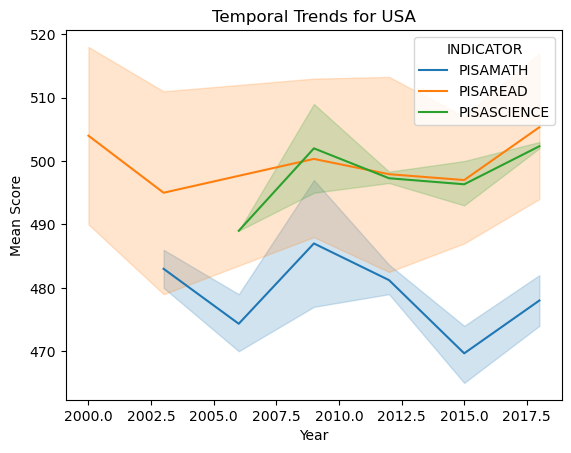

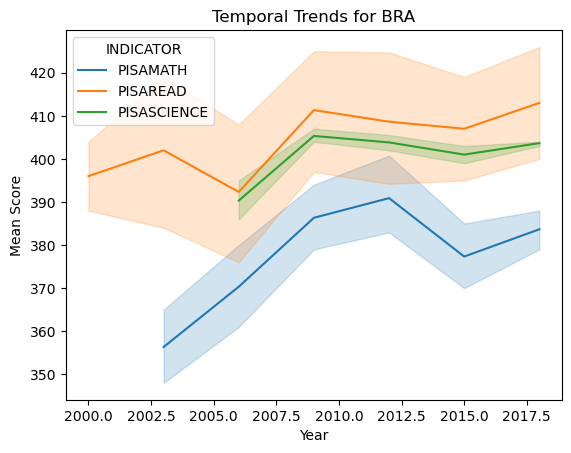

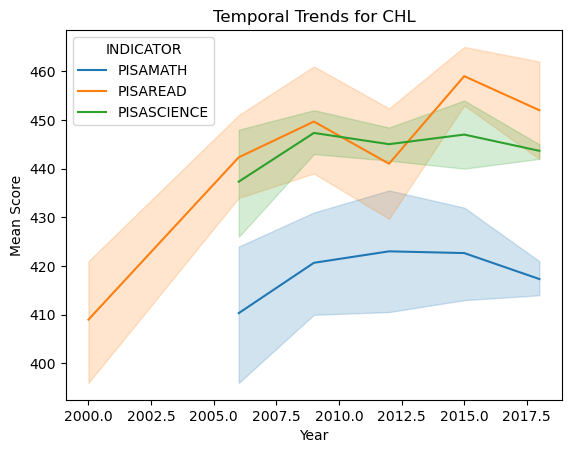

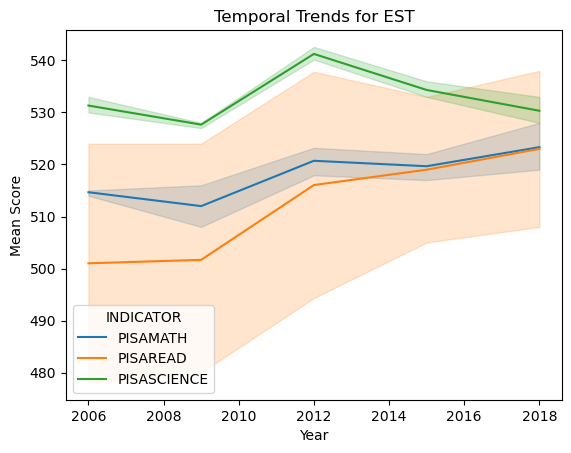

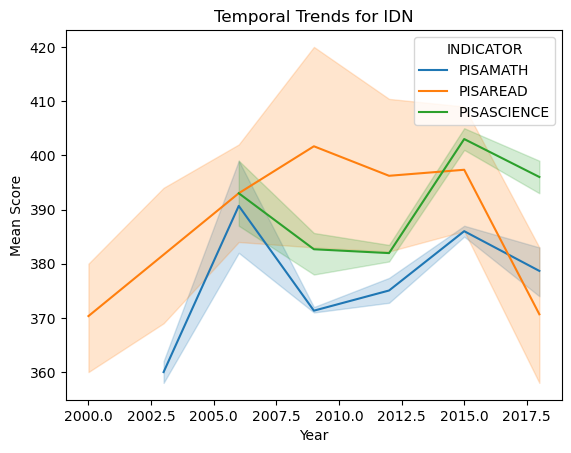

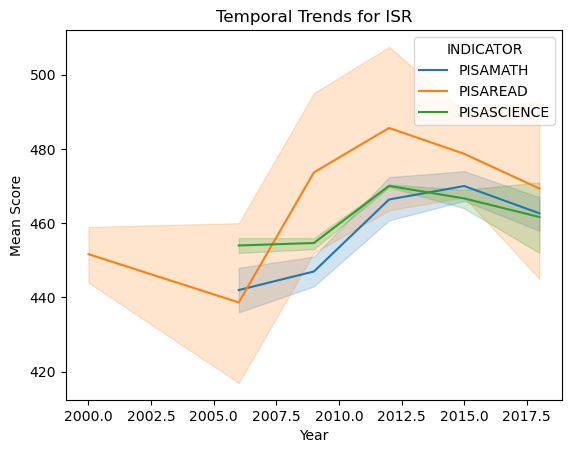

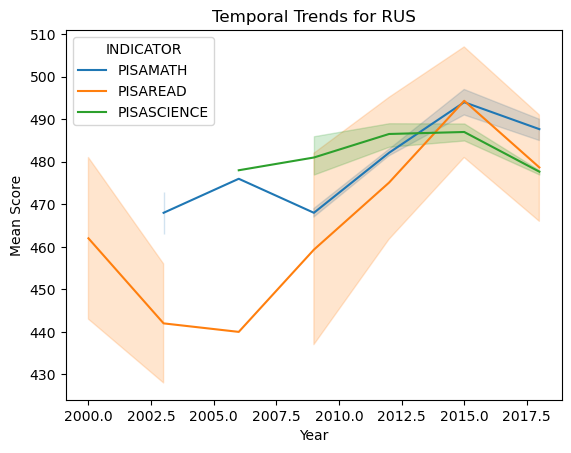

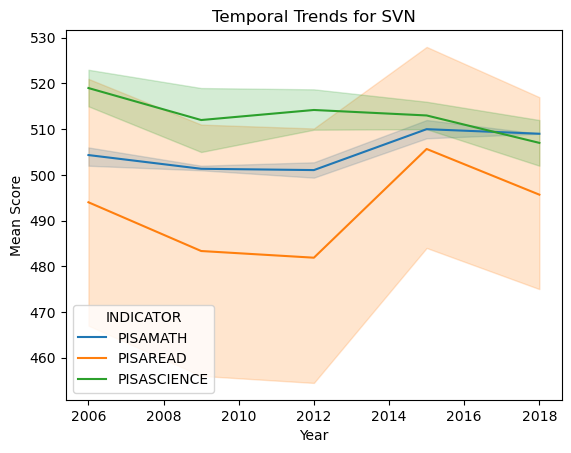

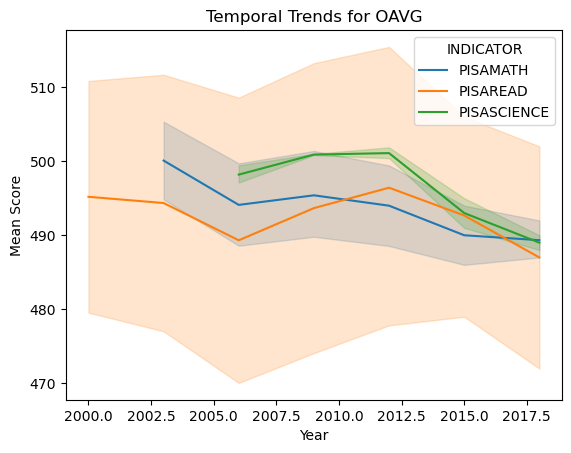

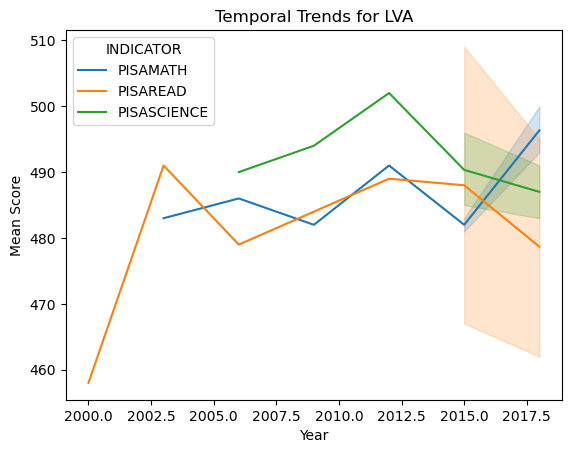

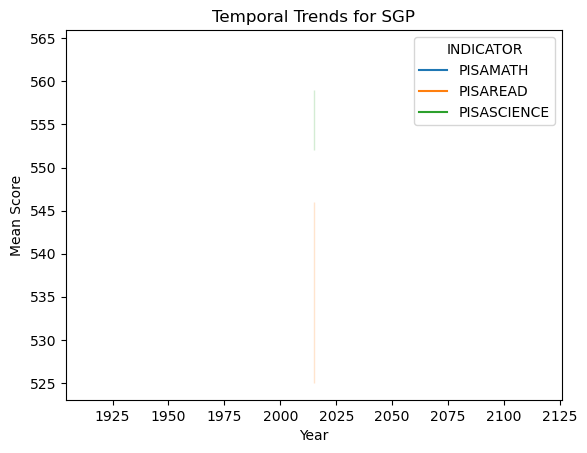

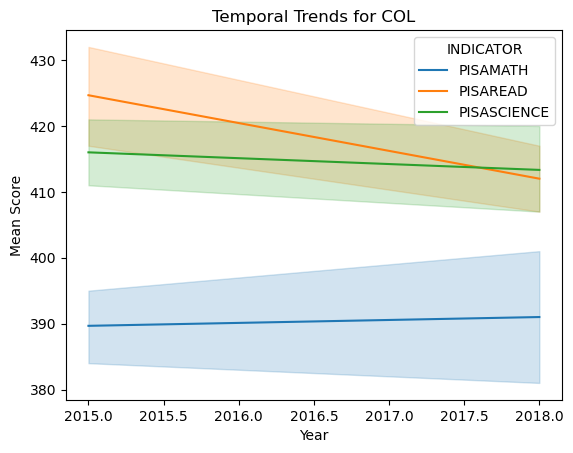

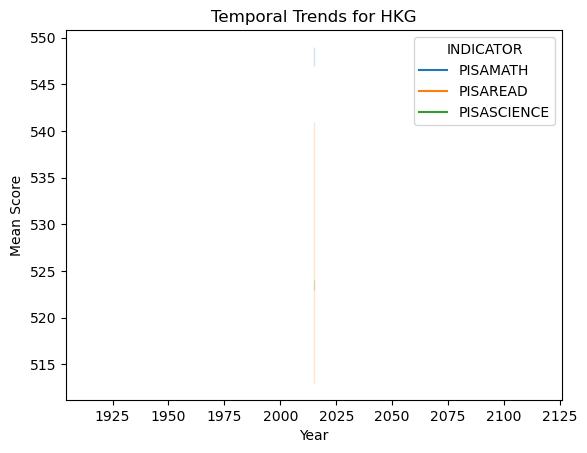

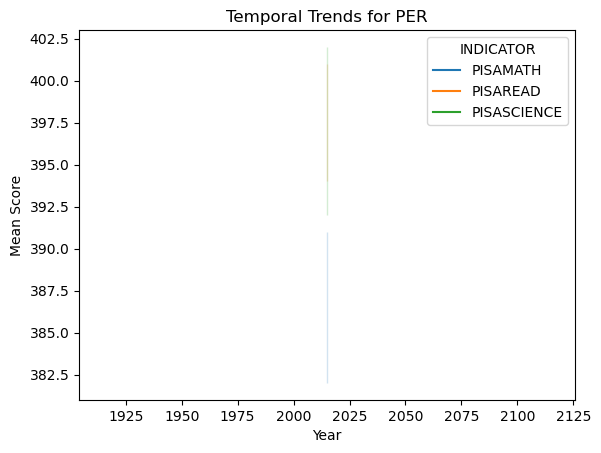

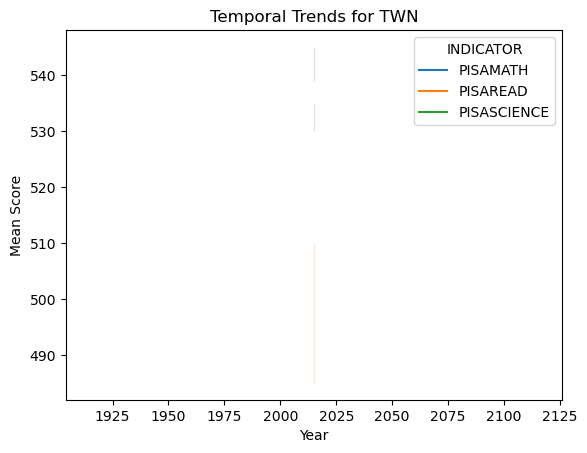

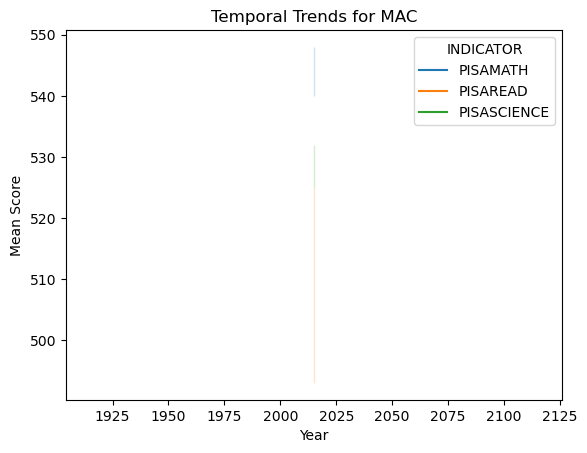

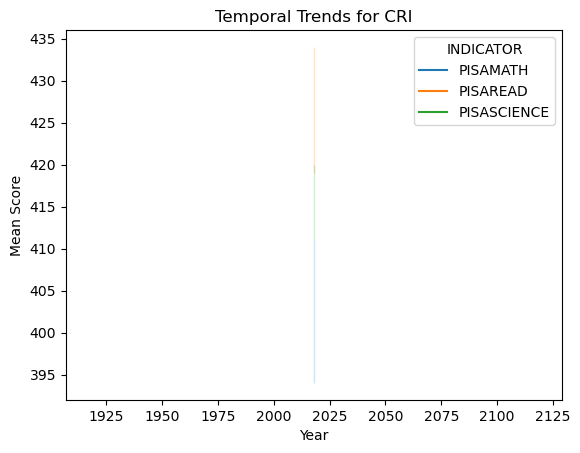

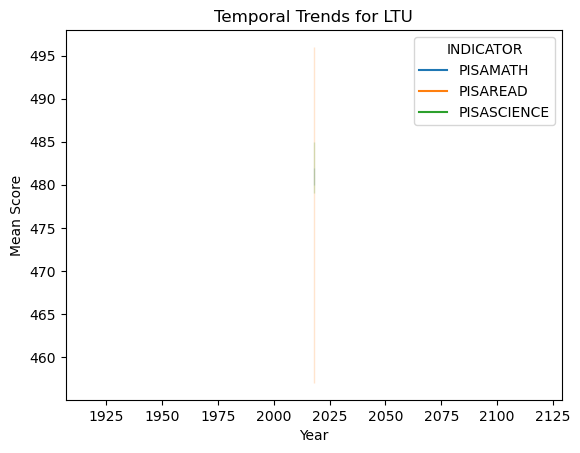

In [20]:
# line plot for temproral trneds by country
for country in df['LOCATION'].unique():
    df_country = df[df['LOCATION'] == country]
    sns.lineplot(x='TIME', y='Value', hue='INDICATOR', data=df_country)
    plt.title(f'Temporal Trends for {country}')
    plt.xlabel('Year')
    plt.ylabel('Mean Score')
    plt.show()


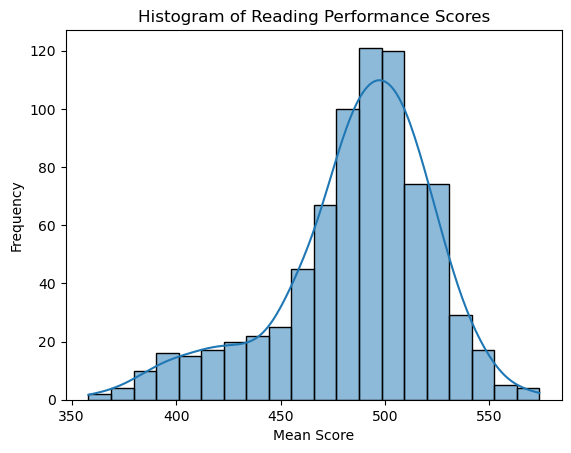

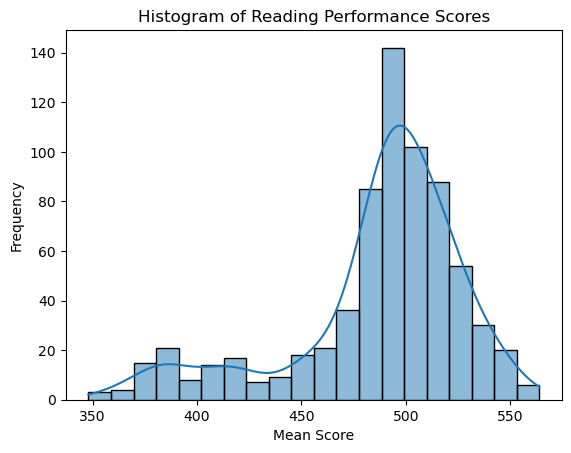

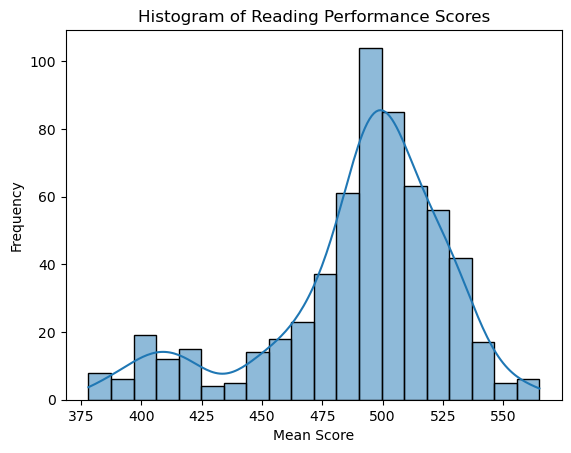

In [21]:
# histogram for score distribution

subjects_of_interest = ['PISAREAD', 'PISAMATH', 'PISASCIENCE']
for subject in subjects_of_interest:
    sns.histplot(x='Value', bins=20, kde=True, data=df_filtered[df_filtered['INDICATOR'] == subject])
    plt.title('Histogram of Reading Performance Scores')
    plt.xlabel('Mean Score')
    plt.ylabel('Frequency')
    # Save the graph as a PNG file with the graph title as the file name
    file_name = f'Histogram of {subject} performance scores.png'
    plt.savefig(file_name)

    plt.show()


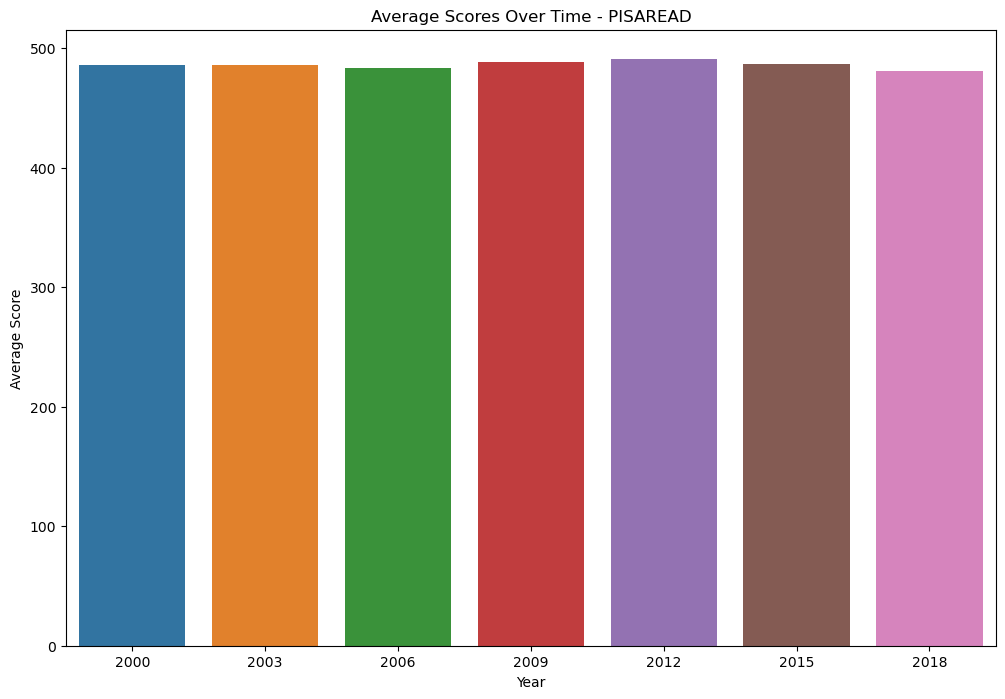

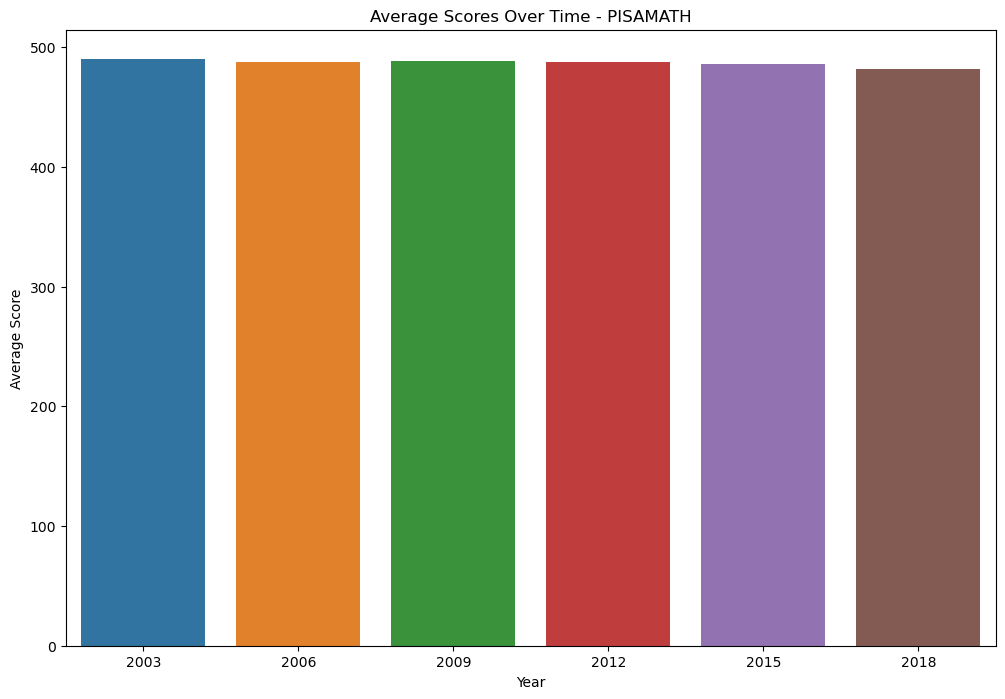

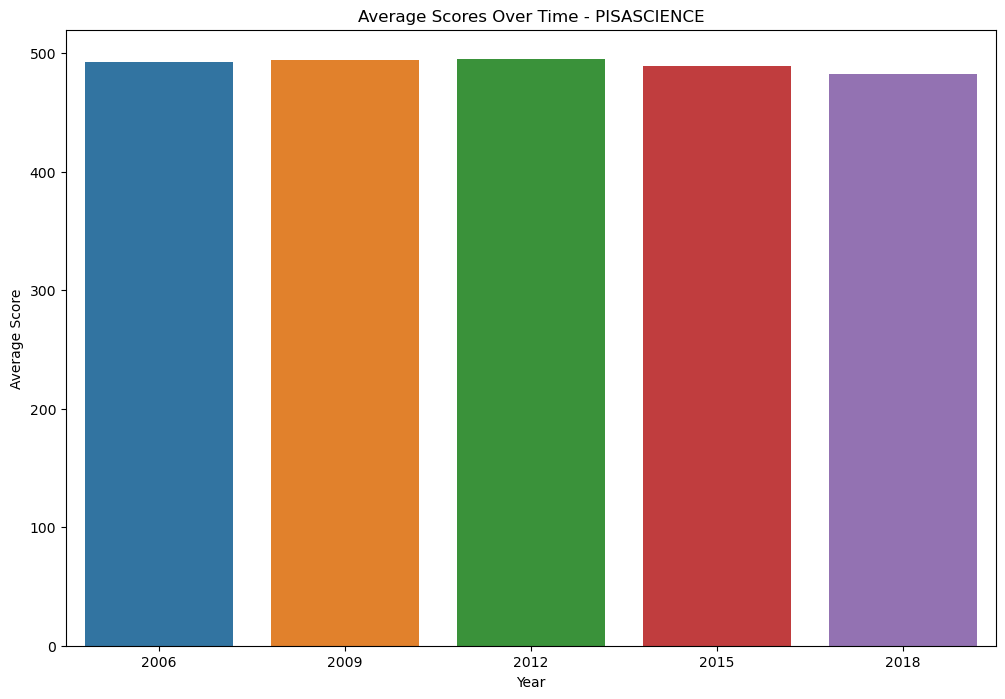

In [22]:
# Filter data for specific subjects (Reading, Mathematics, and Science)
subjects_of_interest = ['PISAREAD', 'PISAMATH', 'PISASCIENCE']
df_filtered = df[df['INDICATOR'].isin(subjects_of_interest)]

# Calculate the average scores for all countries in each indicator over time
df_avg_scores = df_filtered.groupby(['TIME', 'INDICATOR'])['Value'].mean().reset_index()

# Create separate bar graphs for average scores in each indicator
for subject in subjects_of_interest:
    plt.figure(figsize=(12, 8))

    # Filter data for each indicator
    df_subject = df_avg_scores[df_avg_scores['INDICATOR'] == subject]

    # Plot average scores over time
    sns.barplot(x='TIME', y='Value', data=df_subject)

    plt.title(f'Average Scores Over Time - {subject}')
    plt.xlabel('Year')
    plt.ylabel('Average Score')

    plt.show()

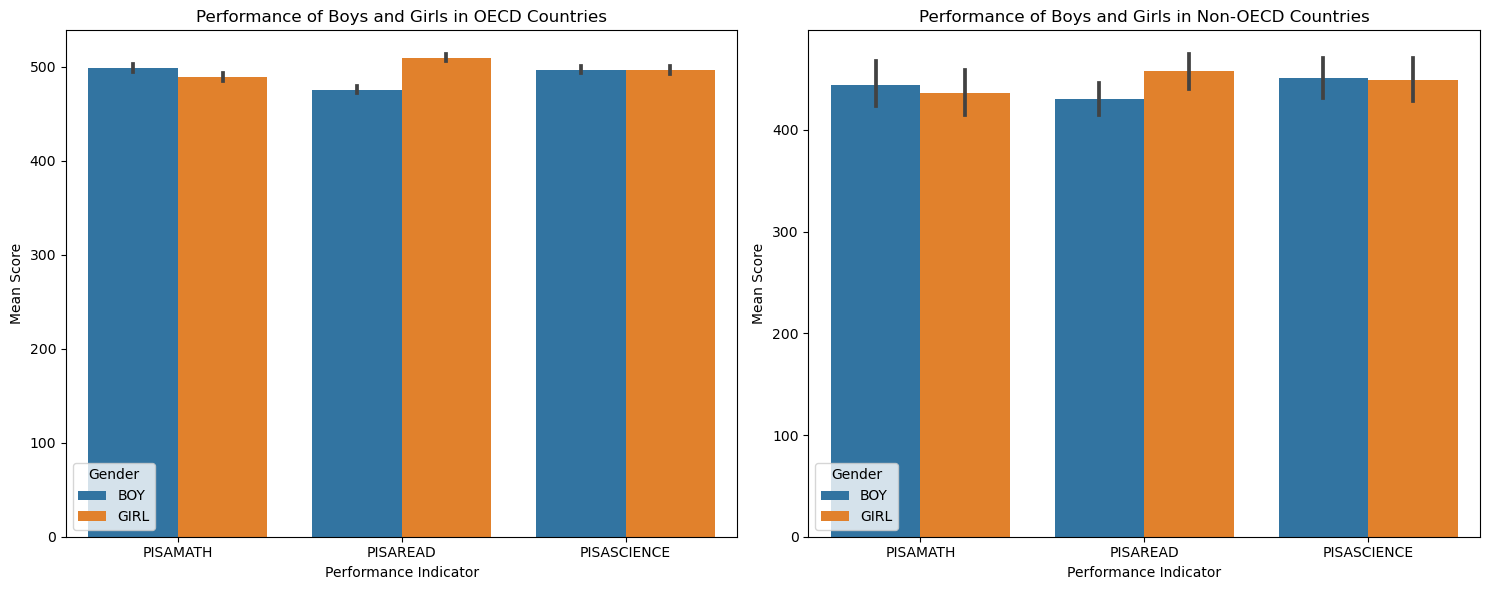

In [24]:
# Separate the dataset into OECD and non-OECD countries
oecd_countries = ['AUS', 'AUT', 'BEL', 'CAN', 'CHE', 'CHL', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HUN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 'MEX', 'NLD', 'NOR', 'NZL', 'POL', 'PRT', 'SVK', 'SVN', 'SWE', 'TUR', 'USA']
df['CountryType'] = df['LOCATION'].apply(lambda x: 'OECD' if x in oecd_countries else 'Non-OECD')

# Filter data for boys and girls
boys_girls_df = df[df['SUBJECT'].isin(['BOY', 'GIRL'])]

# Separate data for OECD and non-OECD countries
boys_girls_oecd = boys_girls_df[boys_girls_df['CountryType'] == 'OECD']
boys_girls_non_oecd = boys_girls_df[boys_girls_df['CountryType'] == 'Non-OECD']

# Create separate bar graphs for OECD and non-OECD countries
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='INDICATOR', y='Value', hue='SUBJECT', data=boys_girls_oecd)
plt.title('Performance of Boys and Girls in OECD Countries')
plt.xlabel('Performance Indicator')
plt.ylabel('Mean Score')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.barplot(x='INDICATOR', y='Value', hue='SUBJECT', data=boys_girls_non_oecd)
plt.title('Performance of Boys and Girls in Non-OECD Countries')
plt.xlabel('Performance Indicator')
plt.ylabel('Mean Score')
plt.legend(title='Gender')

plt.tight_layout()
plt.savefig("gender based score comparison in OECD and Non-OECD countries")
plt.show()